# Soluciones Computacionales a Problemas de Ingeniería IST4360




*   Estudiantes: Kenny Zhu Ye, Samir Mercado
*   Código: 200164380, 200161553


In [374]:
import numpy as np
import sympy as sp
from sympy.printing import latex
from IPython.display import display, Math, Latex

## Ejercicio 1
Haciendo uso de diferencias divididas construya los polinomios interpoladores de primer, segundo y tercer grado para los puntos dados. Para el valor especificado aproxime el resultado usando cada uno de los polinomios.


*   $f(8.4)$, si $f(8.1)=17.56492$, $f(8.3)=17.56492$, $f(8.6)=18.50515$ y $f(8.7)=18.82091$
*   $f(0.9)$, si $f(0.6)=-0.17694460$, $f(0.7)=0.01375227$, $f(0.8)=0.22363362$ y $f(1.0)=0.658009197$


In [375]:
# La función toma dos listas, x e y, que representan los puntos conocidos de la función a interpolar.
def divided_differences(x, y):
    # n es el número de puntos conocidos de la función, que es igual a la longitud de la lista y.
    n = len(y)
    # coef es una lista de coeficientes que se van a calcular y que corresponden al polinomio interpolador de Newton.
    coef = [0] * n
    # En la primera posición de coef se asigna el primer valor de la lista y.
    coef[0] = y[0]

    # Se utiliza un bucle for anidado para calcular los coeficientes restantes.
    # El bucle exterior itera sobre los valores j del 1 al n-1, que corresponden al grado del polinomio interpolador.
    for j in range(1, n):
        # El bucle interior itera sobre los índices de la lista y en orden descendente.
        # Para cada iteración, se calcula la diferencia dividida y se actualiza el valor de la lista y.
        for i in range(n - 1, j - 1, -1):
            y[i] = (y[i] - y[i - 1]) / (x[i] - x[i - j])
        # El coeficiente correspondiente a j se guarda en la lista coef.
        coef[j] = y[j]

    # Finalmente, se devuelve la lista coef con los coeficientes calculados.
    return coef


# La función recibe los coeficientes del polinomio interpolador, una lista x_data con los puntos conocidos de la función,
# y un valor x en el cual se desea evaluar el polinomio interpolador.
def newton_polynomial(coef, x_data, x):
    # n es el grado del polinomio interpolador, que se calcula como la longitud de la lista coef menos 1.
    n = len(coef) - 1
    # result es la variable que almacenará el resultado de la evaluación del polinomio interpolador.
    result = coef[n]

    # Se utiliza un bucle for para calcular el valor del polinomio interpolador en x.
    # El bucle itera sobre los coeficientes del polinomio interpolador en orden descendente,
    # y utiliza la fórmula de Newton para calcular el valor del polinomio en x.
    for i in range(n - 1, -1, -1):
        result = result * (x - x_data[i]) + coef[i]

    # Finalmente, se devuelve el valor del polinomio interpolador evaluado en x.
    return result

In [376]:
# Caso 1
x_data1 = [8.1, 8.3, 8.6, 8.7]
y_data1 = [17.56492, 17.56492, 18.50515, 18.82091]
coef1 = divided_differences(x_data1, y_data1.copy())

# Polinomios interpoladores
P1_1 = lambda x: newton_polynomial(coef1[:2], x_data1[:1], x)
P2_1 = lambda x: newton_polynomial(coef1[:3], x_data1[:2], x)
P3_1 = lambda x: newton_polynomial(coef1, x_data1, x)

# Aproximaciones
f_8_4_P1 = P1_1(8.4)
f_8_4_P2 = P2_1(8.4)
f_8_4_P3 = P3_1(8.4)

# Caso 2
x_data2 = [0.6, 0.7, 0.8, 1.0]
y_data2 = [-0.17694460, 0.01375227, 0.22363362, 0.658009197]
coef2 = divided_differences(x_data2, y_data2.copy())

# Polinomios interpoladores
P1_2 = lambda x: newton_polynomial(coef2[:2], x_data2[:1], x)
P2_2 = lambda x: newton_polynomial(coef2[:3], x_data2[:2], x)
P3_2 = lambda x: newton_polynomial(coef2, x_data2, x)

# Aproximaciones
f_0_9_P1 = P1_2(0.9)
f_0_9_P2 = P2_2(0.9)
f_0_9_P3 = P3_2(0.9)

In [377]:
# construccion de los polinomios

# Caso 1
display(Latex("Aproximacion 1: $f(8.4)$:"))

P1_1_latex = f"P1(x) = {coef1[0]:.5f}, \\quad f(8.4) \\approx {f_8_4_P1:.5f}"
display(Math(P1_1_latex))

P2_1_latex = f"P2(x) = {coef1[0]:.5f} + ({coef1[2]:.4f})(x - {x_data1[0]:.1f})(x - {x_data1[1]:.1f}), \\quad f(8.4) \\approx {f_8_4_P2:.5f}"
display(Math(P2_1_latex))

P3_1_latex = f"P3(x) = {coef1[0]:.5f} + ({coef1[2]:.4f})(x - {x_data1[0]:.1f})(x - {x_data1[1]:.1f}) + ({coef1[3]:.5f})(x - {x_data1[0]:.1f})(x - {x_data1[1]:.1f})(x - {x_data1[2]:.1f}), \\quad f(8.4) \\approx {f_8_4_P3:.5f}"
display(Math(P3_1_latex))

# Caso 2
display(Latex("Aproximacion 2: $f(0.9)$:"))

P1_2_latex = f"P1(x) = {coef2[0]:.8f} + ({coef2[1]:.8f})(x - {x_data2[0]:.1f}), \\quad f(0.9) \\approx {f_0_9_P1:.8f}"
display(Math(P1_2_latex))

P2_2_latex = f"P2(x) = {coef2[0]:.8f} + ({coef2[1]:.8f})(x - {x_data2[0]:.1f}) + ({coef2[2]:.8f})(x - {x_data2[0]:.1f})(x - {x_data2[1]:.1f}), \\quad f(0.9) \\approx {f_0_9_P2:.8f}"
display(Math(P2_2_latex))

P3_2_latex = f"P3(x) = {coef2[0]:.8f} + ({coef2[1]:.8f})(x - {x_data2[0]:.1f}) + ({coef2[2]:.8f})(x - {x_data2[0]:.1f})(x - {x_data2[1]:.1f}) + ({coef2[3]:.8f})(x - {x_data2[0]:.1f})(x - {x_data2[1]:.1f})(x - {x_data2[2]:.1f}), \\quad f(0.9) \\approx {f_0_9_P3:.8f}"
display(Math(P3_2_latex))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Ejercicio 2


*   Construya el polinomio interpolador de cuarto grado para los puntos no igualmente espaciados que se muestran en la tabla a continuación

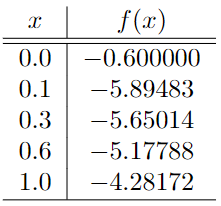
*   Añada el punto $f(1.1)=-3.99583$ y construya el polinomio interpolador de quinto orden.

In [378]:
def lagrange_polynomial(x_values, y_values):
    x = sp.Symbol('x')
    n = len(x_values)
    polynomial = 0

    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_values[j]) / (x_values[i] - x_values[j])
        polynomial += y_values[i] * L_i

    return sp.simplify(polynomial)

In [379]:
# Puntos dados
x_values = [0.0, 0.1, 0.3, 0.6, 1.0]
y_values = [-0.6, -5.89483, -5.65014, -5.17788, -4.28172]

# Polinomio interpolador de cuarto grado
P4 = lagrange_polynomial(x_values, y_values)

# Mostrar P4
print("Polinomio interpolador de cuarto grado: ")
display(Math(f"P4(x) = {latex(P4)}"))

# Añadir el punto f(1.1) = -3.99583
x_values.append(1.1)
y_values.append(-3.99583)

# Polinomio interpolador de quinto grado
P5 = lagrange_polynomial(x_values, y_values)

# Mostrar P5
print("Construyamos el polinomio interpolador de quinto orden añadiendo f(1.1) = -3.99583: ")
display(Math(f"P5(x) = {latex(P5)}"))

Polinomio interpolador de cuarto grado: 


<IPython.core.display.Math object>

Construyamos el polinomio interpolador de quinto orden: 


<IPython.core.display.Math object>

## Ejercicio 3
Haciendo uso de la fórmula del trapecio, regla de Simpson y regla de Simpson 3/8 evalue las siguientes integrales ¿qué puede concluir?

*   $\int_{-0.25}^{0.25}(\cos x)^{2} d x$
*   $\int_{-0.5}^{0} x \ln (x+1) d x$
*   $\int_{0.75}^{1.3}\left((\sin x)^{2}-2 x \sin x+1\right) d x$
*   $\int_{e}^{e+1} \frac{1}{x \ln x} d x$


In [380]:
x = sp.symbols('x')

# Funciones a integrar
f1 = sp.cos(x)**2
f2 = x * sp.log(x + 1)
f3 = sp.sin(x)**2 - 2 * x * sp.sin(x) + 1
f4 = 1 / (x * sp.log(x))

functions = [f1, f2, f3, f4]

# Límites de integración
limits = [
    (-0.25, 0.25),
    (-0.5, 0),
    (0.75, 1.3),
    (np.e, np.e + 1)
]

In [381]:
# Regla del trapecio
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n  # Calcula el tamaño del paso (h) dividiendo el intervalo en n partes iguales
    result = 0.5 * (f.subs(x, a) + f.subs(x, b))  # Inicializa el resultado sumando los valores de la función en los límites a y b, multiplicado por 0.5
    for i in range(1, n):  # Itera sobre los puntos intermedios del intervalo, excluyendo a y b
        result += f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual al resultado
    result *= h  # Multiplica el resultado acumulado por el tamaño del paso (h)
    return result

# Regla de Simpson 1/3
def simpson_rule(f, a, b, n):
    h = (b - a) / n  # Calcula el tamaño del paso (h) dividiendo el intervalo en n partes iguales
    result = f.subs(x, a) + f.subs(x, b)  # Inicializa el resultado sumando los valores de la función en los límites a y b
    for i in range(1, n, 2):  # Itera sobre los puntos intermedios impares del intervalo, excluyendo a y b
        result += 4 * f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual, multiplicado por 4, al resultado
    for i in range(2, n-1, 2):  # Itera sobre los puntos intermedios pares del intervalo, excluyendo a y b
        result += 2 * f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual, multiplicado por 2, al resultado
    result *= h / 3  # Multiplica el resultado acumulado por el tamaño del paso (h) dividido por 3
    return result 

# Regla de Simpson 3/8
def simpson_3_8_rule(f, a, b, n):
    if n % 3 != 0:  # Verifica si n es múltiplo de 3, ya que la regla de Simpson 3/8 requiere que lo sea
        return "n debe ser multiplo de 3"
    h = (b - a) / n  # Calcula el tamaño del paso (h) dividiendo el intervalo en n partes iguales
    result = f.subs(x, a) + f.subs(x, b)  # Inicializa el resultado sumando los valores de la función en los límites a y b
    for i in range(1, n, 3):  # Itera sobre los puntos intermedios del intervalo con un paso de 3, excluyendo a y b
        result += 3 * (f.subs(x, a + i * h) + f.subs(x, a + (i + 1) * h))  # Suma el valor de la función en los puntos actuales (i e i+1), multiplicado por 3, al resultado
    for i in range(3, n-2, 3):  # Itera sobre los puntos intermedios del intervalo con un paso de 3, comenzando desde el tercer punto y excluyendo a, b y el último punto antes de b
        result += 2 * f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual, multiplicado por 2, al resultado
    result *= 3 * h / 8  # Multiplica el resultado acumulado por el tamaño del paso (h) multiplicado por 3 y dividido por 8
    return result

In [382]:
n = 12

for i, (f, (a, b)) in enumerate(zip(functions, limits),1):
    
    integral_repr = sp.latex(sp.Integral(f, (x, a, b)))  # Representación en LaTeX de la integral
    trapezoidal = trapezoidal_rule(f, a, b, n)
    simpson = simpson_rule(f, a, b, n)
    simpson_3_8 = simpson_3_8_rule(f, a, b, n)
    
    display(Math(f"\\text{{Integral {i}: }} {integral_repr}"))
    print(f"  Trapezoidal: {trapezoidal}")
    print(f"  Simpson 13: {simpson}")
    print(f"  Simpson 38: {simpson_3_8}")
    print()

<IPython.core.display.Math object>

  Trapezoidal: 0.489574030576162
  Simpson 13: 0.489712833578692
  Simpson 38: 0.489712914044185



<IPython.core.display.Math object>

  Trapezoidal: 0.0528146939038572
  Simpson 13: 0.0525700891271133
  Simpson 38: 0.0525704353559308



<IPython.core.display.Math object>

  Trapezoidal: -0.0204895172790647
  Simpson 13: -0.0203767170369430
  Simpson 38: -0.0203766182194500



<IPython.core.display.Math object>

  Trapezoidal: 0.272614339296861
  Simpson 13: 0.272514025718998
  Simpson 38: 0.272514205186992



Luego de evaluar las integrales dadas usando las tres reglas de aproximación mencionadas, podemos notar que la regla de Simpson 3/8 ofrece una mayor precisión en la aproximación de las integrales en comparación con las otras dos reglas. Esto es especialmente evidente cuando se utiliza un número pequeño de subintervalos para la aproximación.

En conclusión, podemos decir que la elección de la regla de aproximación dependerá de la precisión requerida en la aproximación de la integral y del número de subintervalos que se deseen utilizar. En general, la regla de Simpson 3/8 es una buena opción para obtener una aproximación precisa de la integral.